In [2]:
import numpy as np
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [3]:
def dist(A, a, b):
    return (np.abs(A.sum(axis=1) - a)).sum() + np.abs(A.sum(axis=0)-b).sum()

In [4]:
def potential(A, x, y, a, b):
    return (np.diag(np.exp(x)) @ A @ np.diag(np.exp(y))).sum() - a @ x - b @ y

In [42]:
def sinkhorn(A, a, b, epsilon):
    k = 0
    factor = np.log(A.sum()/A.min())
    original_A = A.copy() 
    n, m = A.shape
    x = np.zeros(n)
    y = np.zeros(m)
    dists = []
    pots = []
    minsum = []
    while dist(A, a, b) > epsilon:
        dists.append(dist(A, a, b))
        k += 1
        if k % 2 != 0:
            dx = np.log(a / A.sum(axis=1))
            x = x + dx
        else:
            dy = np.log(b / A.sum(axis=0))
            y = y + dy
        pots.append(potential(original_A, x, y, a, b))
        A = np.diag(np.exp(x)) @ original_A @ np.diag(np.exp(y))
        minsum.append(np.minimum(A.sum(axis=0), A.sum(axis=1)).min())
    return np.array(dists), np.array(pots), A, k, minsum

In [40]:
n, m = 100, 100
a = np.random.rand(n) 
a /= a.sum()
b = np.random.rand(m) 
b /= b.sum()
cost = np.random.rand(n, m)
A = np.exp(-cost/regularizer)
epsilon = 1e-15
improvement = epsilon ** 2/np.minimum(a,b).min()

In [43]:
dists, pots, As, k, minsum = sinkhorn(A, a, b, epsilon)

In [44]:
minsum

[5.64956236697042e-05,
 1.9287655116799093e-05,
 5.649562366970426e-05,
 6.31153211096375e-05,
 5.6495623669704294e-05,
 6.0284610186250364e-05,
 5.649562366970425e-05,
 5.9201765245997217e-05,
 5.649562366970422e-05,
 5.817474251282248e-05,
 5.6495623669704246e-05,
 5.7381414429535934e-05,
 5.649562366970419e-05,
 5.684146511922753e-05,
 5.6495623669704246e-05,
 5.650820678424394e-05,
 5.649562366970425e-05,
 5.632652934506511e-05,
 5.649562366970424e-05,
 5.624733546293853e-05,
 5.649562366970425e-05,
 5.6231406561894296e-05,
 5.6495623669704294e-05,
 5.6250199403547505e-05,
 5.649562366970429e-05,
 5.62847450065845e-05,
 5.649562366970424e-05,
 5.6323578332925884e-05,
 5.649562366970426e-05,
 5.636051523744428e-05,
 5.649562366970424e-05,
 5.639275252867022e-05,
 5.649562366970423e-05,
 5.641945735411597e-05,
 5.6495623669704246e-05,
 5.6440824834353036e-05,
 5.649562366970427e-05,
 5.645750346930562e-05,
 5.6495623669704267e-05,
 5.647027530894114e-05,
 5.649562366970428e-05,
 5.64

In [37]:
np.array(rows)

array([[0.00692557, 0.00470664, 0.01440172, ..., 0.01366018, 0.00864485,
        0.02077048],
       [0.00386284, 0.00461122, 0.01889599, ..., 0.01743525, 0.0206605 ,
        0.01472448],
       [0.00692557, 0.00470664, 0.01440172, ..., 0.01366018, 0.00864485,
        0.02077048],
       ...,
       [0.00692557, 0.00470664, 0.01440172, ..., 0.01366018, 0.00864485,
        0.02077048],
       [0.00692557, 0.00470664, 0.01440172, ..., 0.01366018, 0.00864485,
        0.02077048],
       [0.00692557, 0.00470664, 0.01440172, ..., 0.01366018, 0.00864485,
        0.02077048]])

In [29]:
np.diff(pots[dists < 1/2 * np.minimum(a,b).min()])

array([-3.53032181e-09, -3.22736238e-09, -2.94939007e-09, -2.69630185e-09,
       -2.46415777e-09, -2.25271890e-09, -2.05883399e-09, -1.88218374e-09,
       -1.72023995e-09, -1.57264868e-09, -1.43737555e-09, -1.31405864e-09,
       -1.20105792e-09, -1.09802034e-09, -1.00362030e-09, -9.17522502e-10,
       -8.38658032e-10, -7.66714248e-10, -7.00825176e-10, -6.40707043e-10,
       -5.85656856e-10, -5.35419709e-10, -4.89422725e-10, -4.47441639e-10,
       -4.09008827e-10, -3.73925779e-10, -3.41812800e-10, -3.12493587e-10,
       -2.85658608e-10, -2.61157318e-10, -2.38734366e-10, -2.18257856e-10,
       -1.99519512e-10, -1.82406534e-10, -1.66747505e-10, -1.52446500e-10,
       -1.39361411e-10, -1.27407862e-10, -1.16473053e-10, -1.06483267e-10,
       -9.73443548e-11, -8.89954777e-11, -8.13580314e-11, -7.43800577e-11,
       -6.79971635e-11, -6.21662721e-11, -5.68318725e-11, -5.19562171e-11,
       -4.74997819e-11, -4.34257075e-11, -3.96989108e-11, -3.62945229e-11,
       -3.31814576e-11, -

In [19]:
improvement

3.646684084133236e-27

In [6]:
np.random.seed(221)
D = {}
for t in tqdm([10,50,100,500]):
    d = []
    for experiment in (range(10)):
        n, m = t, t
        a = np.random.rand(n) 
        a /= a.sum()
        b = np.random.rand(m) 
        b /= b.sum()
        regularizer = .01
        cost = np.random.rand(n, m)
        A = np.exp(-cost/regularizer)
        dists, pots, As, k = sinkhorn(A, a, b, 1e-14)
        d.append(dists[1:])
    D[t] = d

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

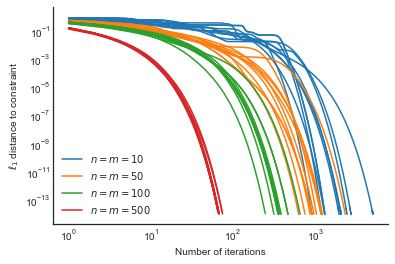

In [12]:
sns.set_color_codes()
sns.set_style('white')
for i, (key, group) in enumerate(D.items()):
    for j, line in enumerate(group):
        if j == 0:
            plt.plot(line, c=sns.color_palette()[i], label='$n=m={}$'.format(key))
        plt.plot(line, c=sns.color_palette()[i])
plt.yscale('log')
plt.xscale('log')
sns.despine()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('$\ell_1$ distance to constraint')
plt.savefig('../reports/paper/figs/sinkhorn.eps')

Text(0,0.5,'L1 distance between row-column sums and targets')

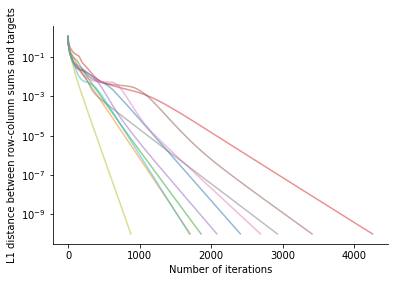

In [452]:
for ds in np.array(d)[np.random.choice(range(len(d)), replace=False, size=10)]:
    plt.plot(ds, '-', alpha=.5)
plt.yscale('log')
sns.despine()
plt.xlabel('Number of iterations')
plt.ylabel('L1 distance between row-column sums and targets')

In [355]:
dists, kl, As, k = sinkhorn(A, a, b, 1e-5)

/Users/jiafengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


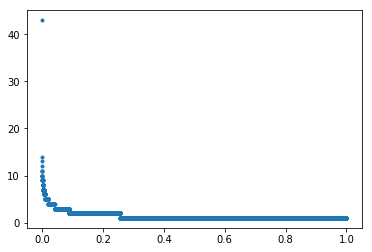

In [281]:
plt.plot(np.linspace(1, 1e-10, 10000), ks, '.')


In [90]:
pots.diff()

AttributeError: 'numpy.ndarray' object has no attribute 'diff'

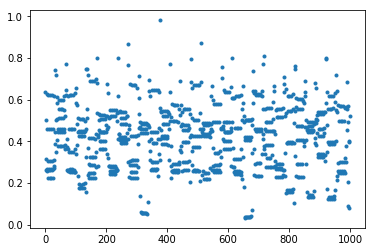

In [134]:
plt.plot(dists[:1000],'.')

In [61]:
32.58673262334614 * 4 * (0.001 ** -2)

130346930.49338455

In [52]:
np.log(A.sum()/A.min())

32.58673262334614

In [62]:
32.58 * 4 * (.001 ** -2)

130320000.0